In [1]:
import sys, os 
from os.path import dirname
path = dirname(dirname(os.getcwd()))
sys.path.insert(0, path)
sys.path.insert(0, '/home/monte.flora/python_packages/scikit-explain')

sys.path.append('/home/monte.flora/python_packages/scikit-explain/tutorial_notebooks')
sys.path.append('/home/monte.flora/python_packages/master/ml_workflow')
sys.path.append('/work/mflora/ROAD_SURFACE')
import skexplain
import shap
import plotting_config
from skexplain.plot.base_plotting import PlotStructure
from skexplain.common.contrib_utils import get_indices_based_on_performance
import numpy as np
import pandas as pd
from bayeshist import bayesian_histogram
import matplotlib.pyplot as plt

from load_models_and_data import load_model_and_data
from probsr_config import FIGURE_MAPPINGS, UNITS
from display_names import to_readable_names, get_units
from load_explain_data import load_explain
#import similaritymeasures
from scipy.interpolate import interp1d
from top_features import top_features
from statsmodels.stats.weightstats import DescrStatsW
from sklearn.metrics import mean_squared_error, r2_score
from scipy.ndimage import gaussian_filter

from scipy.stats import spearmanr, kendalltau
from sklearn.inspection import partial_dependence
from src.common.util import subsampler, normalize_importance, compute_sage

In [2]:
hazard = 'road_surface'
ale, _, shap_vals, X_shap, pd_ds, lime_vals, X_lime, ti_vals, X_ti = load_explain(hazard,  return_pd=True)

In [3]:
(name, model), X, y = load_model_and_data(hazard, test=False)
# Subsample the dataset. 
SIZE=100000
X_sub, y_sub = subsampler(X,y,SIZE)
features = list(X.columns)
est_name = model[0]

feature = 'fric_vel'

results = partial_dependence(model, features=[feature], X=X_sub, grid_resolution=30, percentiles=(0,1)) 

A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.


In [4]:
np.shape(results[1])

(1, 30)

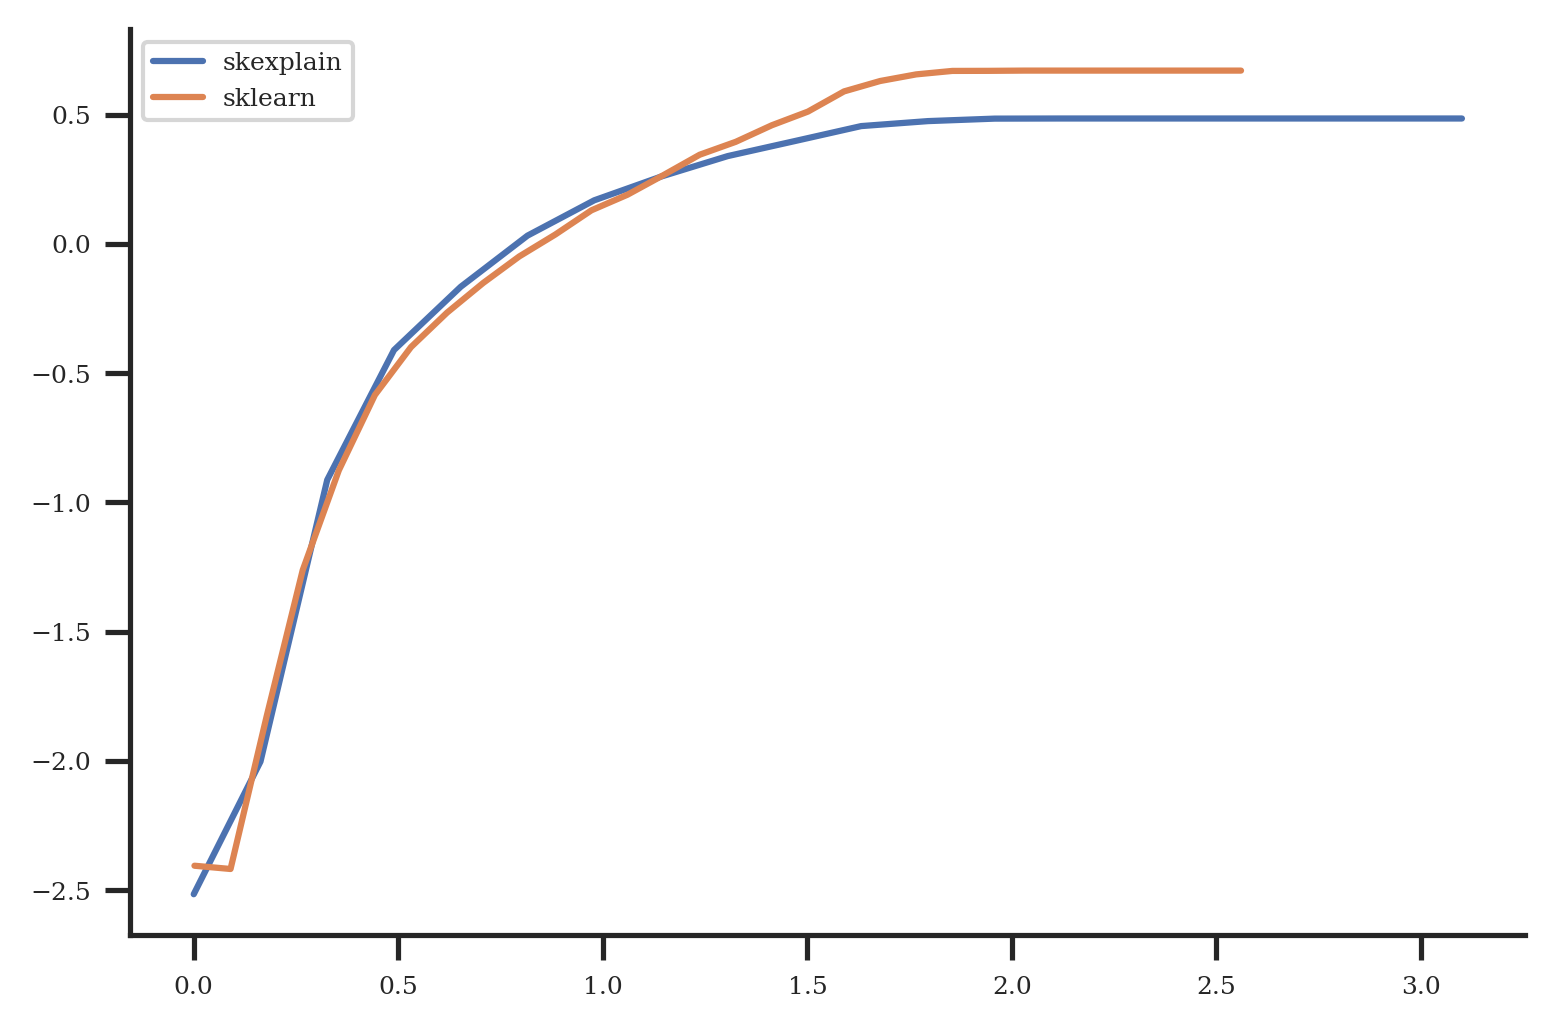

In [7]:
fix, ax = plt.subplots(dpi=300)

x = np.array(results[1])[0,:]
y = np.array(results[0])[0,:] #- np.mean(results[0])
y = y - np.mean(y)

ax.plot(pd_ds[f'{feature}__bin_values'].values, 100.*np.mean(pd_ds[f'{feature}__Random Forest__pd'].values,axis=0), 
        label='skexplain')
ax.plot(x,100.*y, label='sklearn')
ax.legend()
#ax.set_xlim(np.min(x), np.max(y))